Saving highlights_and_shadows.jpg to highlights_and_shadows.jpg
 Image loaded. Applying Gamma = 0.5 to the L-plane


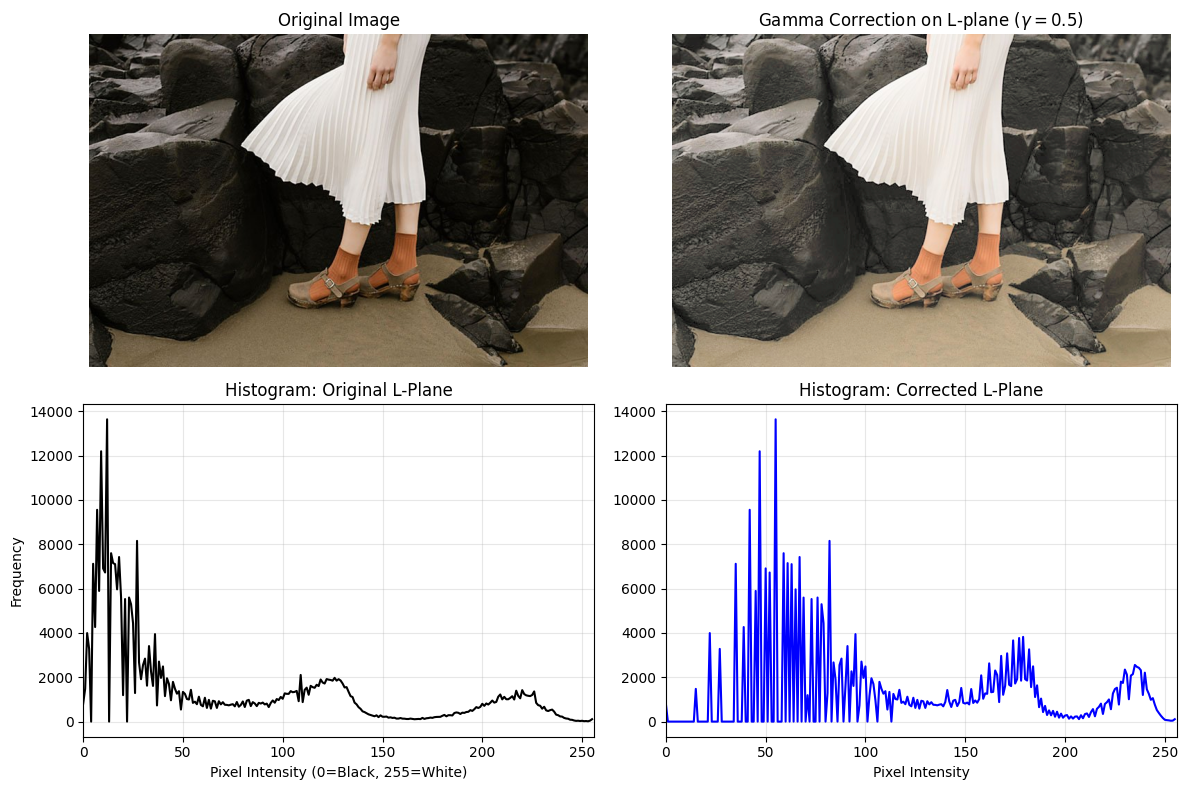

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

gamma = 0.5  # Gamma correction value

# Load the image
img = cv.imread(file_path, cv.IMREAD_COLOR)

if img is None:
    print(" ERROR: Image not found.")
else:
    print(f" Image loaded. Applying Gamma = {gamma} to the L-plane")

    # Convert from BGR to Lab color space
    lab_image = cv.cvtColor(img, cv.COLOR_BGR2Lab)

    # Split the Lab image into L, a, and b channels
    l_channel, a_channel, b_channel = cv.split(lab_image)

    # Apply gamma correction to the L channel only
    f = l_channel / 255.0
    l_corrected = np.clip((f ** gamma) * 255, 0, 255).astype(np.uint8)

    # Apply gamma to L channel only
    lab_corrected = cv.merge((l_corrected, a_channel, b_channel))

    # Convert back to BGR color space
    result_img = cv.cvtColor(lab_corrected, cv.COLOR_Lab2BGR)

    # Compute histograms
    hist_original = cv.calcHist([l_channel], [0], None, [256], [0, 256])
    hist_corrected = cv.calcHist([l_corrected], [0], None, [256], [0, 256])

    # Display all the results
    plt.figure(figsize=(12, 8))

    #  Original image
    plt.subplot(2, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    #  Gamma corrected image
    plt.subplot(2, 2, 2)
    plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
    plt.title(rf'Gamma Correction on L-plane ($\gamma={gamma}$)')
    plt.axis('off')

    # Histograms
    plt.subplot(2, 2, 3)
    plt.plot(hist_original, color='black', label='Original L')
    plt.title('Histogram: Original L-Plane')
    plt.xlabel('Pixel Intensity (0=Black, 255=White)')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    plt.plot(hist_corrected, color='blue', label='Corrected L')
    plt.title('Histogram: Corrected L-Plane')
    plt.xlabel('Pixel Intensity')
    plt.xlim([0, 256])
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()